In [138]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [193]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


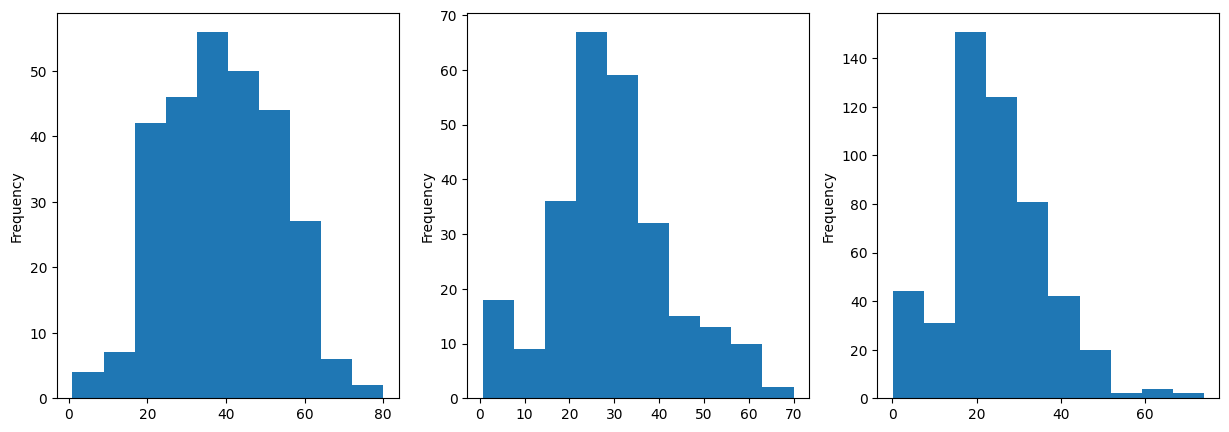

In [194]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

titanic_df[titanic_df['pclass'] == 1.0]['age'].plot(kind='hist', ax=ax[0]);
titanic_df[titanic_df['pclass'] == 2.0]['age'].plot(kind='hist', ax=ax[1]);
titanic_df[titanic_df['pclass'] == 3.0]['age'].plot(kind='hist', ax=ax[2]);

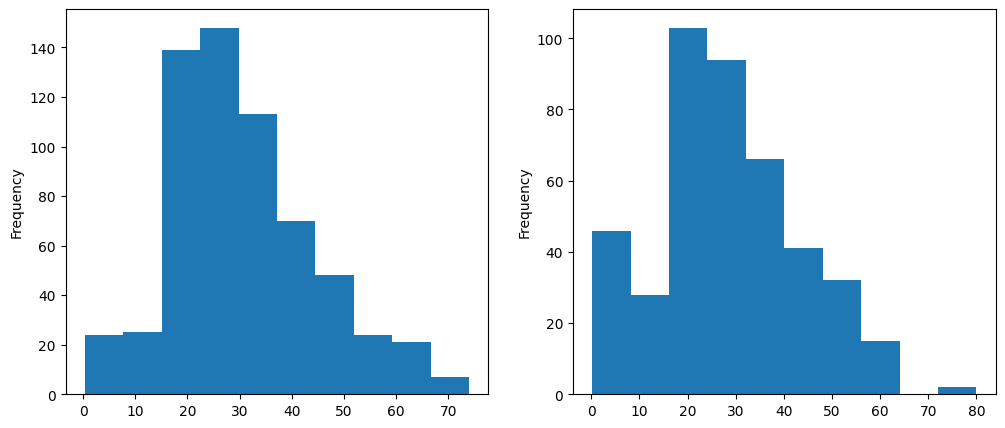

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

titanic_df[titanic_df['survived'] == 0.0]['age'].plot(kind='hist', ax=ax[0]);
titanic_df[titanic_df['survived'] == 1.0]['age'].plot(kind='hist', ax=ax[1]);

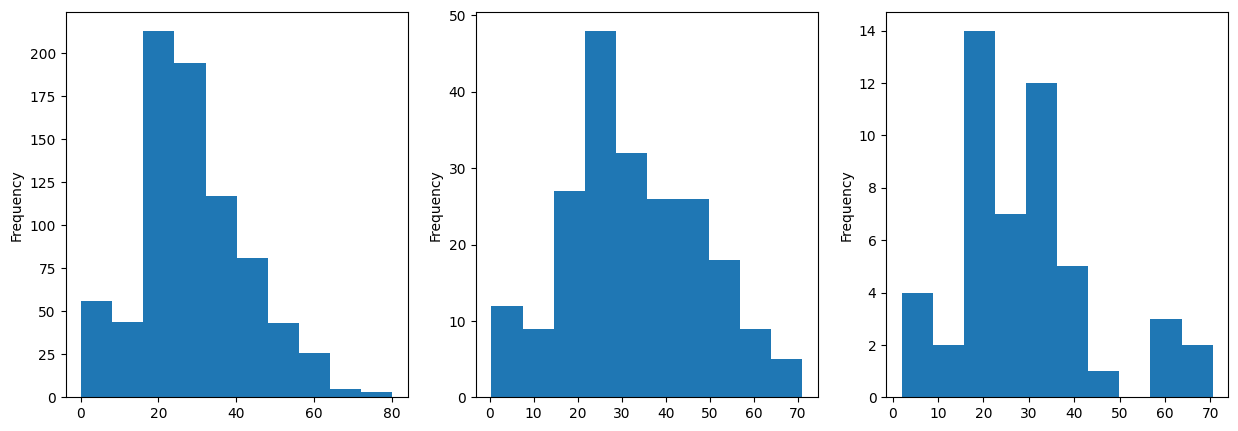

In [196]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

titanic_df[titanic_df['embarked'] == 'S']['age'].plot(kind='hist', ax=ax[0]);
titanic_df[titanic_df['embarked'] == 'C']['age'].plot(kind='hist', ax=ax[1]);
titanic_df[titanic_df['embarked'] == 'Q']['age'].plot(kind='hist', ax=ax[2]);

In [197]:
age_mean = titanic_df.groupby(['pclass', 'survived', 'sex', 'embarked'])['age'].transform('mean')
titanic_df['age'].fillna(age_mean, inplace=True)

In [198]:
titanic_df[titanic_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
titanic_df['fare'].fillna(7.0, inplace=True)

In [200]:
print(titanic_df[titanic_df['embarked'].isnull()])
titanic_df['embarked'].fillna('S', inplace=True)

      pclass  survived                                       name     sex  \
168      1.0       1.0                        Icard, Miss. Amelie  female   
284      1.0       1.0  Stone, Mrs. George Nelson (Martha Evelyn)  female   
1309     NaN       NaN                                        NaN     NaN   

       age  sibsp  parch  ticket  fare cabin embarked boat  body  \
168   38.0    0.0    0.0  113572  80.0   B28      NaN    6   NaN   
284   62.0    0.0    0.0  113572  80.0   B28      NaN    6   NaN   
1309   NaN    NaN    NaN     NaN   7.0   NaN      NaN  NaN   NaN   

           home.dest  
168              NaN  
284   Cincinatti, OH  
1309             NaN  


In [204]:
titanic_df[titanic_df['survived'] == 1.0]['boat'].isnull().sum(), \
titanic_df[titanic_df['survived'] == 0.0]['boat'].isnull().sum()

(0, 800)

In [225]:
survived_mask = titanic_df['survived'] == 1.0
dead_mask = titanic_df['survived'] == 0.0

titanic_df.loc[survived_mask, 'boat'] = titanic_df[survived_mask]['boat'].fillna('boat_unknown')
titanic_df.loc[dead_mask, 'boat'] = titanic_df[dead_mask]['boat'].fillna('not_found')

In [223]:
len(titanic_df[survived_mask]), \
len(titanic_df[dead_mask]), \
titanic_df[survived_mask]['body'].isnull().sum(), \
titanic_df[dead_mask]['body'].isnull().sum()

(500, 809, 0, 0)

In [222]:
titanic_df.loc[survived_mask, 'body'] = titanic_df[survived_mask]['body'].fillna('survived')
titanic_df.loc[dead_mask, 'body'] = titanic_df[dead_mask]['body'].fillna('not_found')

In [232]:
titanic_df['cabin'].fillna('unknown', inplace=True)
titanic_df['home.dest'].fillna('unknown', inplace=True)

titanic_df = titanic_df.iloc[:-1]

In [233]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(6), object(8)
memory usage: 143.3+ KB
